In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# fetching the data tables form system
data = pd.read_excel("/content/drive/MyDrive/Dry_Bean_Dataset.xlsx")
data.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


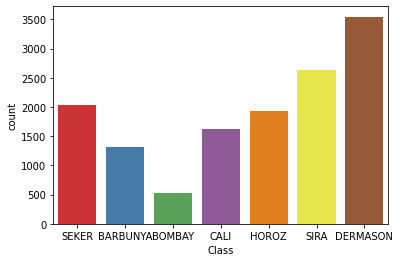

In [4]:
sns.countplot(x = 'Class', data = data, palette = 'Set1')

In [5]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [6]:
data.shape

(13611, 17)

In [7]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [8]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


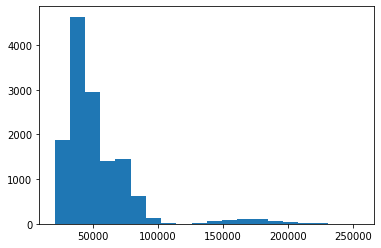

In [9]:
plt.hist(data["Area"], bins= 20)
plt.show()

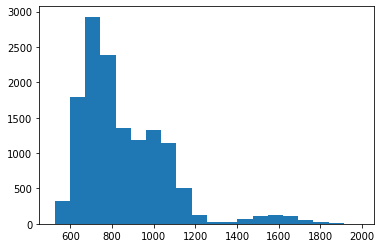

In [10]:
plt.hist(data["Perimeter"], bins= 20)
plt.show()

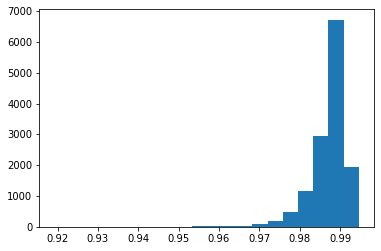

In [12]:
plt.hist(data["Solidity"], bins= 20)
plt.show()

In [ ]:
plt.hist(data["roundness"], bins= 20)
plt.show()

In [6]:
X = data.drop('Class',axis=1).values
Y = data['Class']

In [7]:
class_name = list(data['Class'].unique())
label = [];
for y in Y:
  label.append(class_name.index(y))


In [8]:
label = np.array(label)
label.shape

(13611,)

In [9]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

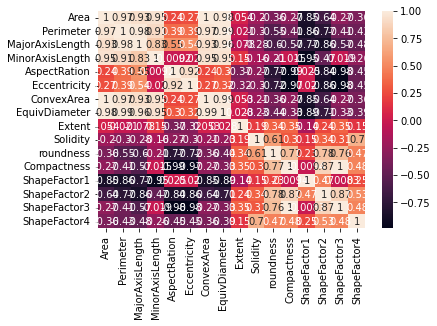

In [10]:
corelation = data.corr()
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

In [11]:
corelation

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


In [13]:
mx = 4
mi = -4
for i in range():


pandas.core.frame.DataFrame

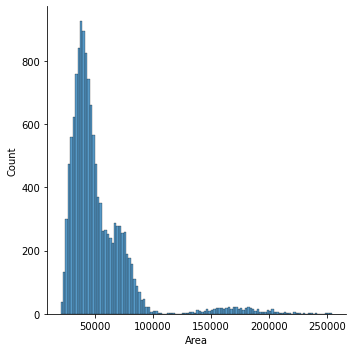

In [14]:
sns.displot(data['Area'])

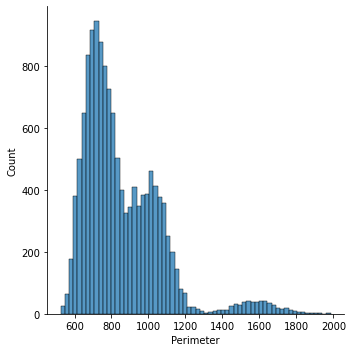

In [15]:
sns.displot(data['Perimeter'])

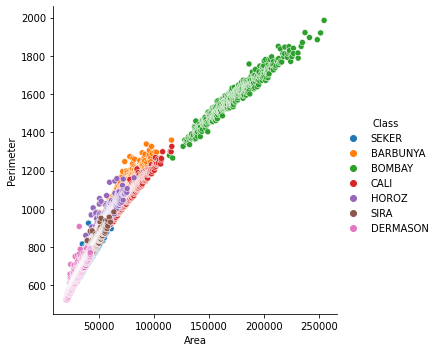

In [16]:
sns.relplot(x = 'Area', y = 'Perimeter', hue = 'Class', data = data)

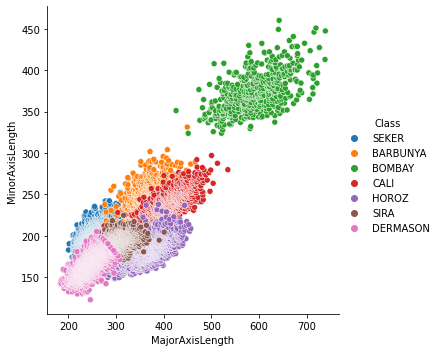

In [17]:
sns.relplot(x = 'MajorAxisLength', y = 'MinorAxisLength', hue = 'Class', data = data)

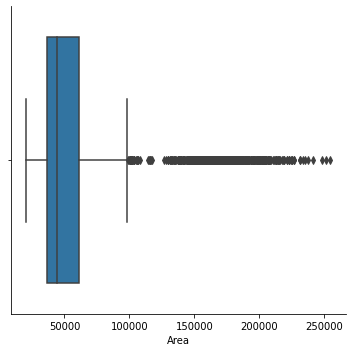

In [18]:
sns.catplot(x = 'Area', kind = 'box', data = data)

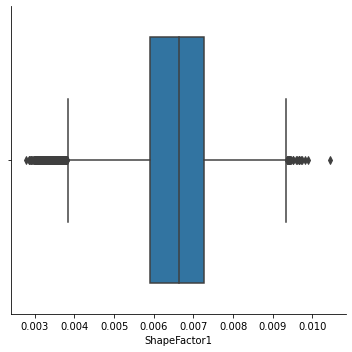

In [19]:
sns.catplot(x = 'ShapeFactor1', kind = 'box', data = data)

# **TSNE**

In [20]:
stnd_X = StandardScaler().fit_transform(X)

In [21]:
X.shape

(13611, 16)

In [22]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 70 , n_iter = 1000, learning_rate= 200, verbose = 1)

In [23]:
tsne_data = model.fit_transform(stnd_X)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 13611 samples in 0.000s...
[t-SNE] Computed neighbors for 13611 samples in 2.518s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13611
[t-SNE] Computed conditional probabilities for sample 2000 / 13611
[t-SNE] Computed conditional probabilities for sample 3000 / 13611
[t-SNE] Computed conditional probabilities for sample 4000 / 13611
[t-SNE] Computed conditional probabilities for sample 5000 / 13611
[t-SNE] Computed conditional probabilities for sample 6000 / 13611
[t-SNE] Computed conditional probabilities for sample 7000 / 13611
[t-SNE] Computed conditional probabilities for sample 8000 / 13611
[t-SNE] Computed conditional probabilities for sample 9000 / 13611
[t-SNE] Computed conditional probabilities for sample 10000 / 13611
[t-SNE] Computed conditional probabilities for sample 11000 / 13611
[t-SNE] Computed conditional probabilities for sample 12000 / 13611
[t-SNE] Computed conditional probabilities for sa

In [24]:
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data = tsne_data, columns =("Dim_1", "Dim_2", "label"))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


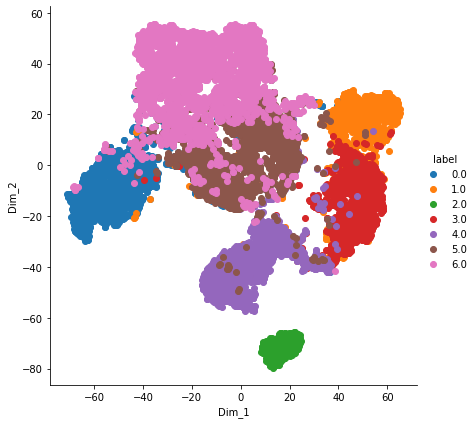

In [25]:
sns.FacetGrid(tsne_df, hue ="label", size = 6).map( plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# **Gaussian Naive Bayes**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report

In [27]:
x_train, x_test, y_train, y_test = train_test_split( stnd_X, Y, test_size = 0.2, random_state= 0)

In [28]:
x_train.shape

(10888, 16)

In [29]:
y_test.shape

(2723,)

In [30]:
gnb = GaussianNB()

In [31]:
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

In [32]:
y_pred

array(['DERMASON', 'DERMASON', 'DERMASON', ..., 'SEKER', 'BARBUNYA',
       'DERMASON'], dtype='<U8')

In [33]:
accuracy_score(y_pred, y_test)*100

89.68049944913699

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.84      0.79      0.81       255
      BOMBAY       1.00      1.00      1.00        92
        CALI       0.88      0.89      0.88       350
    DERMASON       0.93      0.89      0.91       735
       HOROZ       0.94      0.96      0.95       390
       SEKER       0.93      0.94      0.94       376
        SIRA       0.82      0.86      0.84       525

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.90      2723
weighted avg       0.90      0.90      0.90      2723



# **Multinominal Naive Byes**

In [35]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
x_train_mnb = scaler.fit_transform(x_train)
x_test_mnb = scaler.transform(x_test)

In [36]:
mnb = MultinomialNB()

In [37]:
mnb.fit(x_train_mnb, y_train)
y_pred = mnb.predict(x_test)

In [38]:
y_pred[:10]

array(['DERMASON', 'DERMASON', 'DERMASON', 'DERMASON', 'DERMASON',
       'HOROZ', 'SEKER', 'DERMASON', 'DERMASON', 'DERMASON'], dtype='<U8')

In [39]:
accuracy_score(y_pred, y_test)*100

56.15130370914433

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       255
      BOMBAY       0.13      1.00      0.23        92
        CALI       0.00      0.00      0.00       350
    DERMASON       0.64      0.97      0.77       735
       HOROZ       0.74      0.92      0.82       390
       SEKER       0.86      0.97      0.92       376
        SIRA       0.00      0.00      0.00       525

    accuracy                           0.56      2723
   macro avg       0.34      0.55      0.39      2723
weighted avg       0.40      0.56      0.46      2723



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **PCA**

In [41]:
from sklearn.decomposition import PCA

In [42]:
steps  = 0.01
variance = 0.90

for i in range(10):
  pca = PCA(variance)

  pca.fit(x_train)

  x_train_pca= pca.transform(x_train)
  x_test_pca= pca.transform(x_test)

  gnb.fit(x_train_pca, y_train)
  y_pred = gnb.predict(x_test_pca)

  print('VARIANCE PRESERVED = ', variance, '%\n')

  print('no of features = ', pca.n_components_, '\nAccuracy = ' , accuracy_score(y_pred, y_test)*100)
  print(classification_report(y_test, y_pred))
  variance += steps


VARIANCE PRESERVED =  0.9 %

no of features =  4 
Accuracy =  86.74256334924716
              precision    recall  f1-score   support

    BARBUNYA       0.74      0.65      0.69       255
      BOMBAY       1.00      1.00      1.00        92
        CALI       0.83      0.82      0.82       350
    DERMASON       0.90      0.89      0.90       735
       HOROZ       0.91      0.96      0.93       390
       SEKER       0.93      0.93      0.93       376
        SIRA       0.81      0.83      0.82       525

    accuracy                           0.87      2723
   macro avg       0.87      0.87      0.87      2723
weighted avg       0.87      0.87      0.87      2723

VARIANCE PRESERVED =  0.91 %

no of features =  4 
Accuracy =  86.74256334924716
              precision    recall  f1-score   support

    BARBUNYA       0.74      0.65      0.69       255
      BOMBAY       1.00      1.00      1.00        92
        CALI       0.83      0.82      0.82       350
    DERMASON       0.90  

# **ROC**
## Performing One vs Rest because it's multiclass

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

In [64]:
x_train, x_test, y_train, y_test = train_test_split( stnd_X, Y, test_size = 0.2, random_state= 0)

In [75]:
y_train = np.array(y_train)
y_test = np.array(y_test)

(10888,) (2723,)
(2723,)


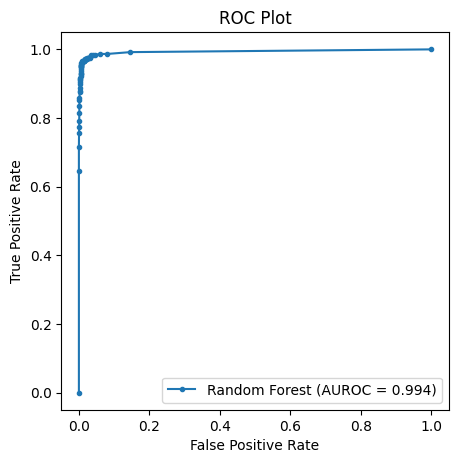

(10888,) (2723,)
(2723,)


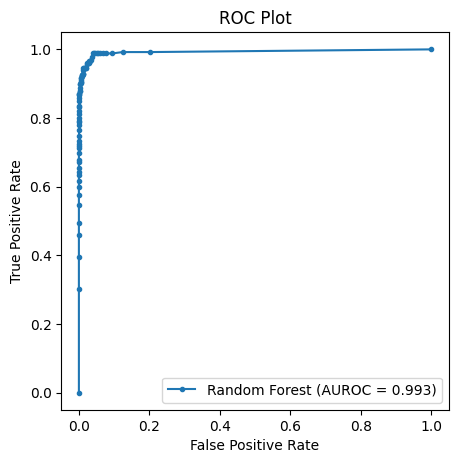

(10888,) (2723,)
(2723,)


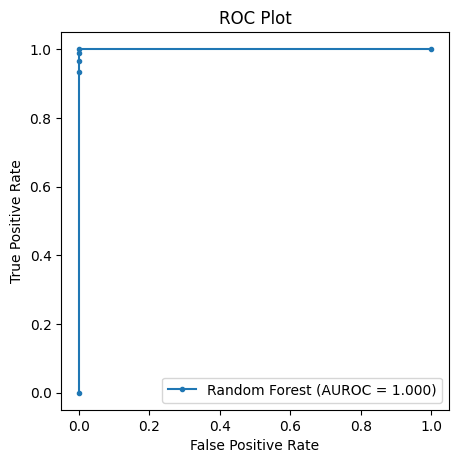

(10888,) (2723,)
(2723,)


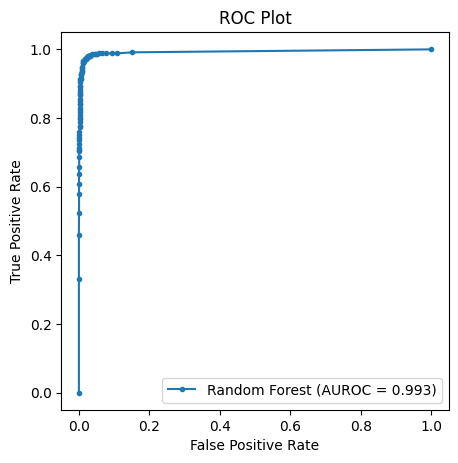

(10888,) (2723,)
(2723,)


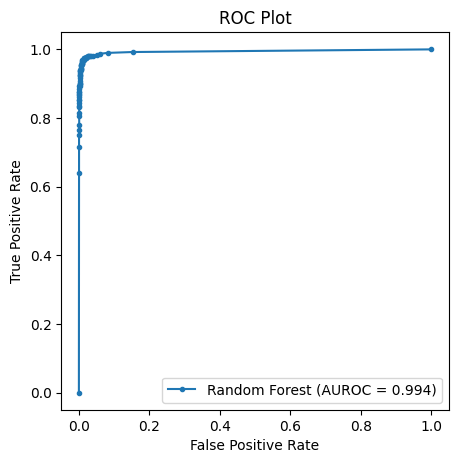

(10888,) (2723,)
(2723,)


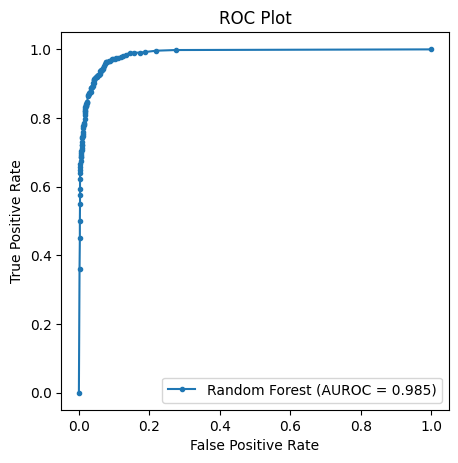

(10888,) (2723,)
(2723,)


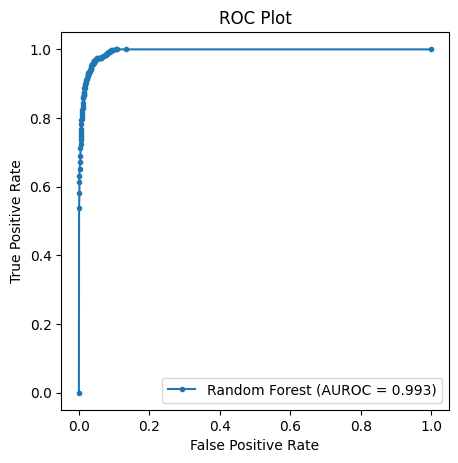

In [81]:
for cls in class_name:
  y_train_roc = np.zeros(len(y_train))
  y_test_roc = np.zeros(len(y_test))

  for i in range(len(y_test)):  
    if cls == y_test[i]:
      y_test_roc[i] = 1

  for i in range(len(y_train)):  
    if cls == y_train[i]:
      y_train_roc[i] = 1


  rf = RandomForestClassifier()
  rf.fit(x_train, y_train_roc)
  rf_prob = rf.predict_proba(x_test)
  rf_prob = rf_prob[:, 1]
  auc = roc_auc_score(y_test_roc, rf_prob)

  rf_fpr, rf_tpr, _ = roc_curve(y_test_roc, rf_prob)
  plt.figure(figsize=(5, 5), dpi=100)
  plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % auc)
  plt.title('ROC Plot')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()


# **Logistic Regression**

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial')

In [84]:
y_pred = log_reg_model.predict(x_test)

In [85]:
print("The Training data Accuracy is: ", log_reg_model.score(x_train, y_train))

The Training data Accuracy is:  0.9237692872887583


In [86]:
print("The testing data Accuracy is: ", log_reg_model.score(x_test, y_test))

The testing data Accuracy is:  0.9283878075651855


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.87      0.92       255
      BOMBAY       1.00      1.00      1.00        92
        CALI       0.94      0.95      0.94       350
    DERMASON       0.94      0.93      0.93       735
       HOROZ       0.95      0.96      0.96       390
       SEKER       0.95      0.96      0.96       376
        SIRA       0.86      0.88      0.87       525

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723

